In [4]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import glob
import time
import pandas as pd
from statistics import mean
import math

# plt.rcParams["figure.figsize"] = (3,3)
print (time.ctime())

Sun Aug 15 21:23:06 2021


In [8]:
# file1 ="E:/Google_Drive_Backup_E/Data/Beamline_Data/Beamline_Cycles-2hr_W0028_H07-210806-121346-4.csv"
file1 = "/mnt/e/Google_Drive_Backup_E/Data/Beamline_Data/Beamline_Cycles-2hr_W0028_H07-210806-121346-4.csv"
# file1 = "/home/andrei/Data/TPX3/CHIP0/Test/Beamline_Cycles-2hr_W0028_H07-210806-121346-4.csv"

print (file1, time.ctime())

data1 = pd.read_csv(file1) 
print(pd.read_csv(file1, nrows=5))
print(time.ctime())

/mnt/e/Google_Drive_Backup_E/Data/Beamline_Data/Beamline_Cycles-2hr_W0028_H07-210806-121346-4.csv Sun Aug 15 21:27:52 2021
   #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
0     9    20  575725083392        150             150         NaN
1   161   247  575725096192        450             450         NaN
2   160    34  575725126912        350             350         NaN
3   160    35  575725138944         75              75         NaN
4    63   221  575725373952        375             375         NaN
Sun Aug 15 21:30:06 2021


In [9]:
data1.shape
# , data2.shape

(134220760, 6)

In [3]:
# "Line {}: {}".format(cnt, line.strip())
# split1 = file1.split('/')[-1]
# print(split1)
# file = file1.split('.')[0]
file = file1[:-4]
print(file)


NameError: name 'file1' is not defined

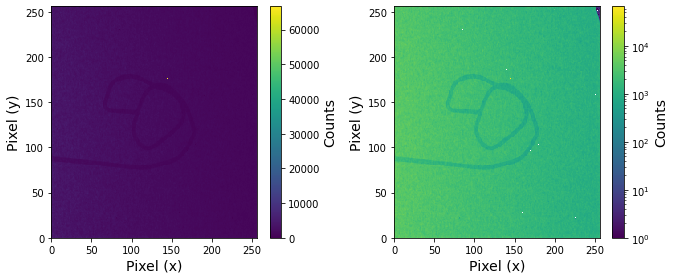

In [11]:
#File 1 grid
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4), facecolor='w')

h = ax0.hist2d(data1['#Row'], data1['#Col'], bins = 256, range = [(0, 256), (0, 256)])
cbar1 = fig.colorbar(h[3], ax = ax0)
cbar1.set_label('Counts', fontsize=14)
ax0.set_xlabel('Pixel (x)', fontsize=14)
ax0.set_ylabel('Pixel (y)', fontsize=14)
# ax0.set_title('RF ON', fontsize=17)

h = ax1.hist2d(data1['#Row'], data1['#Col'], bins = 256, range = [(0, 256), (0, 256)], norm=mpl.colors.LogNorm())
cbar2 = fig.colorbar(h[3], ax = ax1)
cbar2.set_label('Counts', fontsize=14)
ax1.set_xlabel('Pixel (x)', fontsize=14)
ax1.set_ylabel('Pixel (y)', fontsize=14)
# ax1.set_title('RF ON', fontsize=17)

fig.tight_layout()
fig.savefig(file+'_256x256.png', bbox_inches='tight')
plt.show()

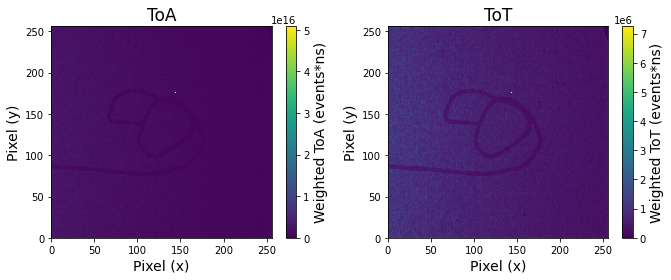

In [8]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4), facecolor='w')
# data1['#Row'], data1['#Col'], bins = GridX1max-GridX1min, range = [(GridX1min, GridX1max), (GridY1min, GridY1max)]
h = ax0.hist2d(data1['#Row'], 
               data1['#Col'], 
               weights=data1['#ToA']/4096.*25., 
               bins = 256, range = [(0, 256), (0, 256)],
               )
cbar1 = fig.colorbar(h[3], ax = ax0)
#     cbar1.set_ticks([0,50,100,150,200,250])
#     tick_locator = ticker.MaxNLocator(nbins=6)
#     cbar1.locator = tick_locator
#     cbar1.update_ticks()
cbar1.set_label('Weighted ToA (events*ns)', fontsize=14)
ax0.set_xlabel('Pixel (x)', fontsize=14)
ax0.set_ylabel('Pixel (y)', fontsize=14)
ax0.set_title('ToA', fontsize=17)

h = ax1.hist2d(data1['#Row'], 
               data1['#Col'], 
               weights=data1['#ToT[arb]'], 
               bins = 256, range = [(0, 256), (0, 256)],
               )
cbar2 = fig.colorbar(h[3], ax = ax1)
#     cbar2.set_ticks([0,300,600,900,1200,1500])
#     tick_locator = ticker.MaxNLocator(nbins=6)
#     cbar2.locator = tick_locator
#     cbar2.update_ticks()
cbar2.set_label('Weighted ToT (events*ns)', fontsize=14)
ax1.set_xlabel('Pixel (x)', fontsize=14)
ax1.set_ylabel('Pixel (y)', fontsize=14)
ax1.set_title('ToT', fontsize=17)
fig.tight_layout()
fig.savefig(file+'_Weights.png', bbox_inches='tight')

In [9]:
# def min_max(data, grid_x_min, grid_x_max, grid_y_min, grid_y_max):
#     """Returns DataFrame filtering values less than min or greater than max for two columns"""
#     x_cond = (data['#Row'] >grid_x_min) & (data['#Row'] < grid_x_max)
#     y_cond = (data['#Col'] > grid_y_min) & (data['#Col'] < grid_y_max)
#     new_data = data[x_cond & y_cond]
#     return new_data
def toa_section(data, toa_min, toa_max):
    return data[(data['#ToA'] > toa_min) & (data['#ToA'] < toa_max)]


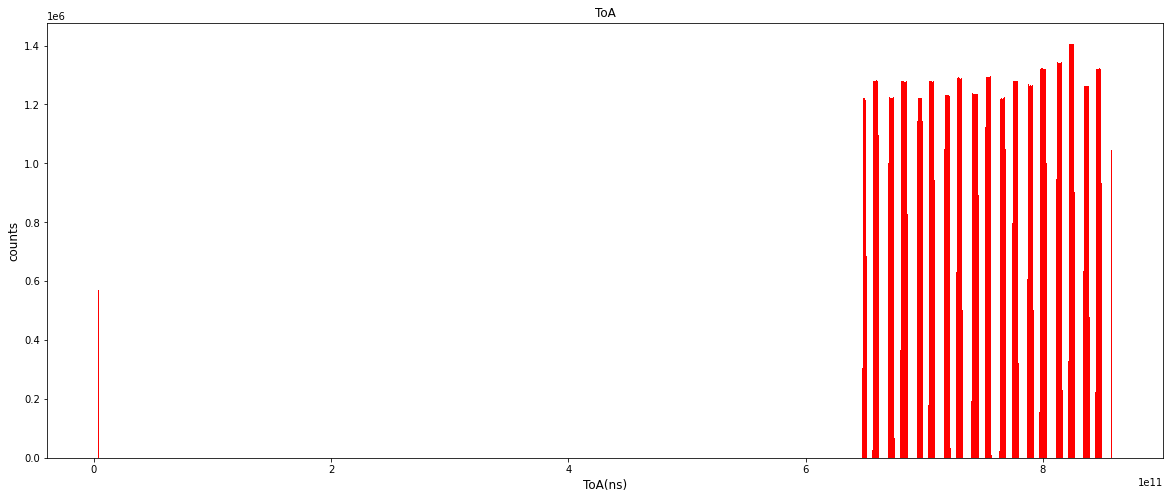

In [14]:
fig, ax1 = plt.subplots(ncols=1, figsize=(20, 8), facecolor='w')

nbins = 1000

plt.hist(data1['#ToA']/4096.*25., bins= nbins, color = 'r')
#,range=(6e11,9e11)
plt.title("ToA", fontsize = 12) # change the title
plt.xlabel('ToA(ns)',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
# plt.hist(Pt1_df['#ToT[arb]'], bins= nbins, range = [0, 20000], lw=3, histtype='step', label = 'file 2', color = 'red')

# plt.xlabel('ToT, ns')
# plt.legend()
plt.show()
fig.tight_layout()
fig.savefig(file+'_ToA.png', bbox_inches='tight')